# Questions:

Are there any crime types that have a signifigant effect on the number of homicides and shootings, which occur in the City of Baltimore?

Are there any patterns to the different crime types, as they relate to one anohter?

Can certain crimes act as a precursor 'warning' that homicides are coming?

# Null hypothesis:

Other crime types have no effect on Homicides and shootings in Baltimore City, there are no patterns.


# Data Source: 

https://data.baltimorecity.gov/api/views/wsfq-mvij/rows.csv?accessType=DOWNLOAD

In [1]:
import pandas as pd
import datetime


In [2]:
#Read downloaded data into pandas df
df = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data (1).csv')
df.head()

C:\Users\cyeager\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,03/14/2020,12:00:00,3CF,800 N HOWARD ST,ROBBERY - COMMERCIAL,I,FIREARM,124,CENTRAL,MOUNT VERNON,-76.620000,39.299323,NaN,LAUNDRY/CLEANRS/SHOE,NaN,1
1,03/14/2020,15:37:00,6C,2500 N CHARLES ST,LARCENY,I,NaN,512,NORTHERN,CHARLES VILLAGE,-76.617081,39.318200,NaN,DRUG STORE / MED BL,NaN,1
2,03/14/2020,13:00:00,6J,500 MAUDE AVE,LARCENY,NaN,NaN,913,SOUTHERN,BROOKLYN,-76.602687,39.238962,NaN,NaN,Brooklyn,1
3,03/14/2020,22:39:00,9S,2500 WASHINGTON BLVD,SHOOTING,Inside,FIREARM,831,SOUTHWEST,MORRELL PARK,-76.652239,39.266966,NaN,STREET,NaN,1
4,03/14/2020,23:16:00,4B,CROSS ST & S CHARLES ST,AGG. ASSAULT,O,KNIFE,942,SOUTHERN,NaN,-76.614368,39.276819,NaN,STREET,NaN,1


In [3]:
#Check null values
df.isnull().sum()

CrimeDate               0
CrimeTime              24
CrimeCode               0
Location             1364
Description             0
Inside/Outside      34665
Weapon             234258
Post                 2396
District                0
Neighborhood        10711
Longitude            1659
Latitude             1659
Location 1         296727
Premise             34917
vri_name1          261641
Total Incidents         0
dtype: int64

In [4]:
#Drop unwanted cols
df=df.drop(['CrimeCode', 'Location','Inside/Outside','Weapon','Neighborhood','Location 1','Premise'], axis=1)
round(df.isnull().sum()/len(df) *100,2)



CrimeDate           0.00
CrimeTime           0.01
Description         0.00
Post                0.81
District            0.00
Longitude           0.56
Latitude            0.56
vri_name1          88.18
Total Incidents     0.00
dtype: float64

In [5]:
#Create year column
df['Year'] = pd.DatetimeIndex(df['CrimeDate']).year
df=df[(df['Year'] >= 2017)]

In [6]:
#Brief overview of data
df.describe(include='object')

,CrimeDate,CrimeTime,Description,Post,District,vri_name1
count,154369,154357,154369,153375.0,154369,18299
unique,1169,1456,14,128.0,10,8
top,12/20/2018,00:00:00,LARCENY,913.0,NORTHEAST,Tri-District
freq,212,3864,33948,2914.0,22946,3535


In [7]:
#Explore crime by District
grouped = df.groupby('District').size()
CrimebyDistrict = grouped.to_frame().reset_index()
CrimebyDistrict.columns = ['District', 'Count']
#county_Counts=pd.merge(mycounties, OD_County, left_on = 'NAMELSAD', right_on = 'NAMECOMBI')
#county_Counts.sort_values('OD_Count', ascending=False)
CrimebyDistrict

,District,Count
0,CENTRAL,18036
1,EASTERN,13873
2,NORTHEAST,22946
3,NORTHERN,16094
4,NORTHWEST,15340
5,SOUTHEAST,21551
6,SOUTHERN,17245
7,SOUTHWEST,17154
8,UNKNOWN,139
9,WESTERN,11991


In [8]:
#Check out crime numbers by volume
df['Description'].value_counts()

LARCENY                 33948
COMMON ASSAULT          26911
BURGLARY                20529
LARCENY FROM AUTO       19106
AGG. ASSAULT            18020
AUTO THEFT              13315
ROBBERY - STREET        11476
ROBBERY - COMMERCIAL     2873
SHOOTING                 2249
ROBBERY - CARJACKING     1740
ROBBERY - RESIDENCE      1601
HOMICIDE                 1055
RAPE                     1034
ARSON                     512
Name: Description, dtype: int64

In [9]:
#Drop common assault, doesnt concern our study
df = df[df.Description != 'COMMON ASSAULT']

#Group all Crimes into 3 categories Hom/Shoot, property, and violent and rename the row value name as one of theses 3
searchfor=['LARCENY','LARCENY FROM AUTO','AUTO THEFT','BURGLARY','ARSON']
filt = df['Description'].str.contains('|'.join(searchfor), na=False)
df.loc[filt,'Description'].value_counts()#.sort_values(ascending=False).nlargest(10)

df.loc[df['Description'].str.contains('|'.join(searchfor), na=False), 'Description'] = 'Property Crime'

In [10]:
searchfor=['AGG. ASSAULT','ROBBERY - STREET','ROBBERY - COMMERCIAL','ROBBERY - CARJACKING','ROBBERY - RESIDENCE','RAPE']
filt = df['Description'].str.contains('|'.join(searchfor), na=False)
df.loc[filt,'Description'].value_counts()#.sort_values(ascending=False).nlargest(10)

df.loc[df['Description'].str.contains('|'.join(searchfor), na=False), 'Description'] = 'Violent Crime'

In [11]:
searchfor=['HOMICIDE','SHOOTING']
filt = df['Description'].str.contains('|'.join(searchfor), na=False)
df.loc[filt,'Description'].value_counts()#.sort_values(ascending=False).nlargest(10)

df.loc[df['Description'].str.contains('|'.join(searchfor), na=False), 'Description'] = 'Hom_shoot'

In [12]:
#Check out these new counts
df['Description'].value_counts()

Property Crime    87410
Violent Crime     36744
Hom_shoot          3304
Name: Description, dtype: int64

In [13]:
#Ensure no import nulls
df.isnull().sum()

CrimeDate               0
CrimeTime              12
Description             0
Post                  890
District                0
Longitude             743
Latitude              743
vri_name1          112813
Total Incidents         0
Year                    0
dtype: int64

In [14]:
#Group all crimes by date for time series analysis, get new frame with crime counts by day, transposed, generate year month and week cols
df['CrimeDate']=pd.to_datetime(df['CrimeDate'])

CitywideGrouped=df.groupby(['CrimeDate','Description']).count()['District']

CitywideFinalFrame=CitywideGrouped.unstack()
CitywideFinalFrame = CitywideFinalFrame.fillna(0)

CitywideFinalFrame['Year'] = CitywideFinalFrame.index.year
CitywideFinalFrame['Month'] = CitywideFinalFrame.index.month
CitywideFinalFrame['Weekday Name'] = CitywideFinalFrame.index.weekday_name

CitywideFinalFrame

Description,Hom_shoot,Property Crime,Violent Crime,Year,Month,Weekday Name
CrimeDate,,,,,,
2017-01-01,4.0,73.0,49.0,2017,1,Sunday
2017-01-02,1.0,90.0,34.0,2017,1,Monday
2017-01-03,3.0,91.0,23.0,2017,1,Tuesday
2017-01-04,2.0,94.0,29.0,2017,1,Wednesday
2017-01-05,1.0,88.0,27.0,2017,1,Thursday
...,...,...,...,...,...,...
2020-03-10,2.0,47.0,35.0,2020,3,Tuesday
2020-03-11,0.0,50.0,17.0,2020,3,Wednesday
2020-03-12,0.0,43.0,23.0,2020,3,Thursday


With assistance from https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [15]:
#scatterplot of the 3 crime types to look for obvious patterns, some seasonality noticed
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(18, 8)})

cols_plot = ['Hom_shoot', 'Property Crime', 'Violent Crime']
axes = CitywideFinalFrame[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals')

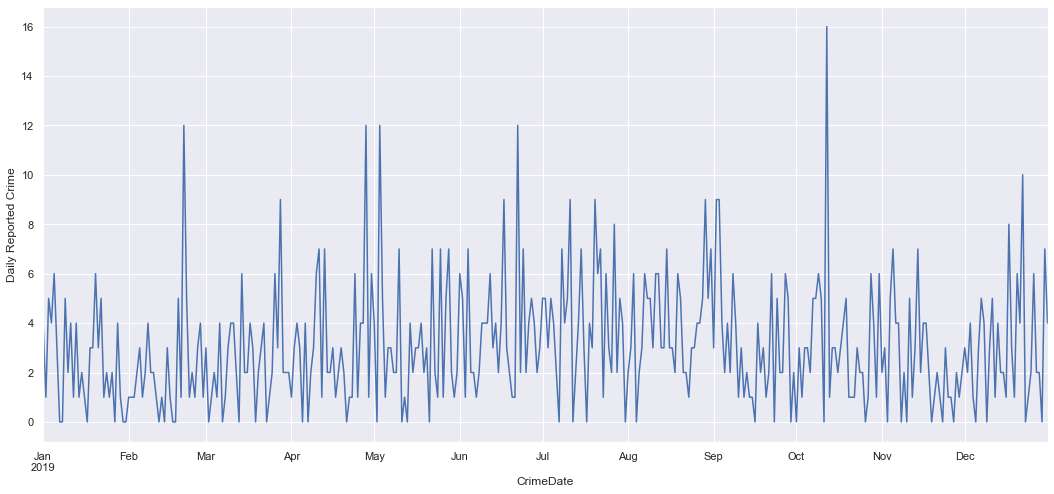

In [16]:
#Check obvious trends for 1 year of homshoot
ax = CitywideFinalFrame.loc['2019','Hom_shoot'].plot(figsize=(18, 8))
ax.set_ylabel('Daily Reported Crime');

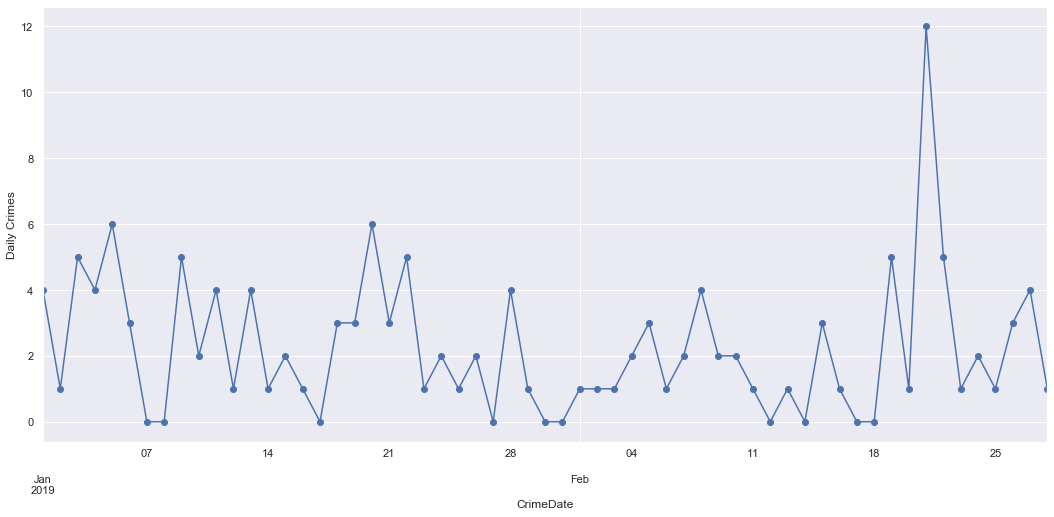

In [17]:
#Check out low point in seasonality lull
ax = CitywideFinalFrame.loc['2019-01':'2019-02', 'Hom_shoot'].plot(marker='o', linestyle='-',figsize=(18, 8))
ax.set_ylabel('Daily Crimes');

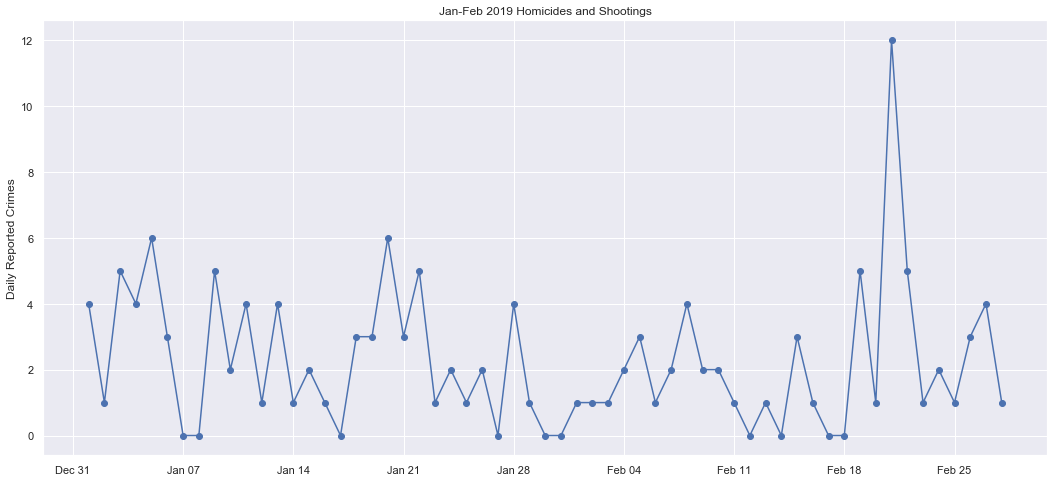

In [18]:
#reformat above so xlab shows month
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(CitywideFinalFrame.loc['2019-01':'2019-02', 'Hom_shoot'], marker='o', linestyle='-')
ax.set_ylabel('Daily Reported Crimes')
ax.set_title('Jan-Feb 2019 Homicides and Shootings')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

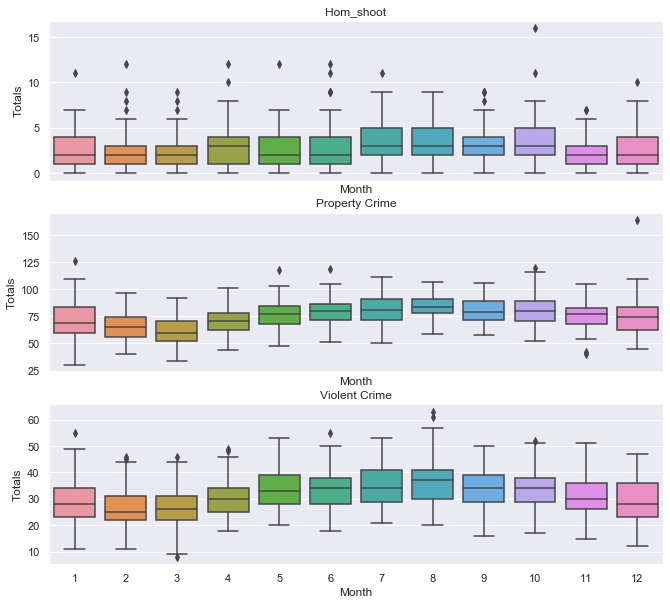

In [19]:
#check out seasonality using box plots pattern more noticeable with prop and vio slow winters, high summers. Can still be 
#seen with homshoot
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Hom_shoot', 'Property Crime', 'Violent Crime'], axes):
    sns.boxplot(data=CitywideFinalFrame, x='Month', y=name, ax=ax)
    ax.set_ylabel('Totals')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

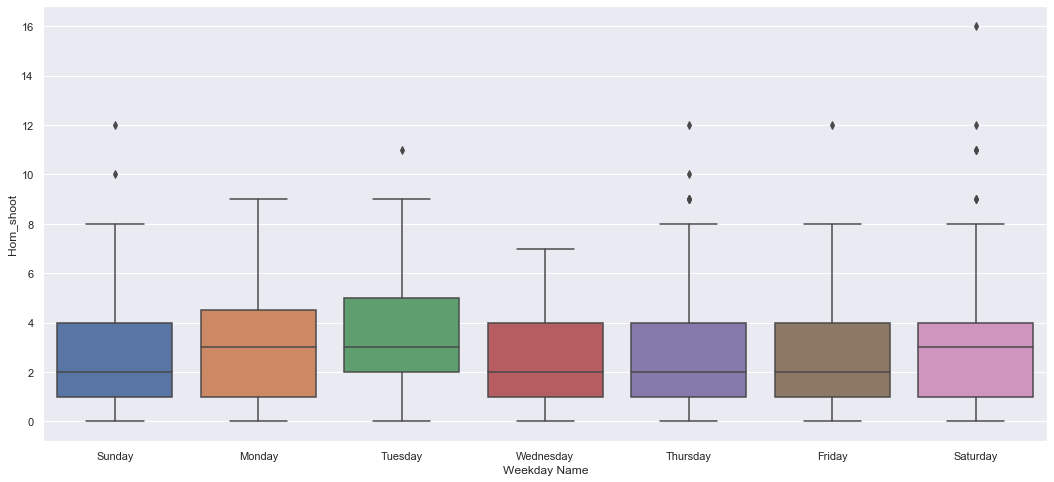

In [20]:
sns.set(rc={'figure.figsize':(18, 8)})

sns.boxplot(data=CitywideFinalFrame, x='Weekday Name', y='Hom_shoot');
#interesting to see weekends arent always highest for hom shoot

In [21]:
data_columns = ['Hom_shoot', 'Property Crime', 'Violent Crime']

# Resample main dataframe to weekly frequency, aggregating with mean create new df
CitywideFinalFrame_Week = CitywideFinalFrame[data_columns].resample('W').mean()


# Resample main dataframe to monthly frequency, aggregating with sum, create new df

CitywideFinalFrame_monthly = CitywideFinalFrame[data_columns].resample('M').sum(min_count=28)
CitywideFinalFrame_Week.head(3)
CitywideFinalFrame_monthly.head(3)

Description,Hom_shoot,Property Crime,Violent Crime
CrimeDate,,,
2017-01-31,100.0,2692.0,1117.0
2017-02-28,67.0,2091.0,888.0
2017-03-31,60.0,2073.0,872.0


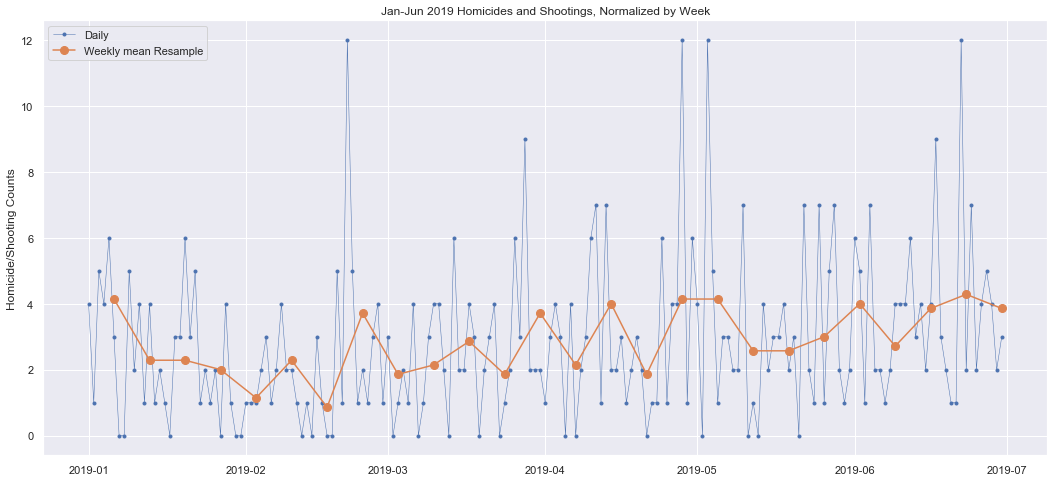

In [22]:
#Visuaizing time series homshoot for first 6 months of 2019 with new resample data overlayed
# Start and end of the date range to extract
start, end = '2019-01', '2019-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(CitywideFinalFrame.loc[start:end, 'Hom_shoot'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(CitywideFinalFrame_Week.loc[start:end, 'Hom_shoot'],
marker='o', markersize=8, linestyle='-', label='Weekly mean Resample')
ax.set_ylabel('Homicide/Shooting Counts')
ax.set_title('Jan-Jun 2019 Homicides and Shootings, Normalized by Week')

ax.legend();

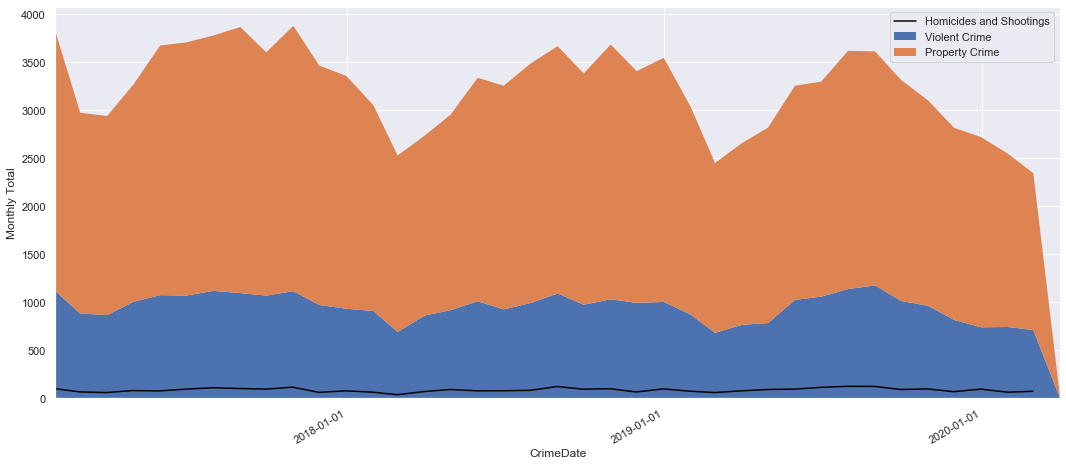

In [23]:
#Use area chart to look for matching patterns between three crime categories. They trend together a lot.
#Hard to see homshoot because of difference in volume
fig, ax = plt.subplots()
ax.plot(CitywideFinalFrame_monthly['Hom_shoot'], color='black', label='Homicides and Shootings')
CitywideFinalFrame_monthly[['Violent Crime','Property Crime']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total');

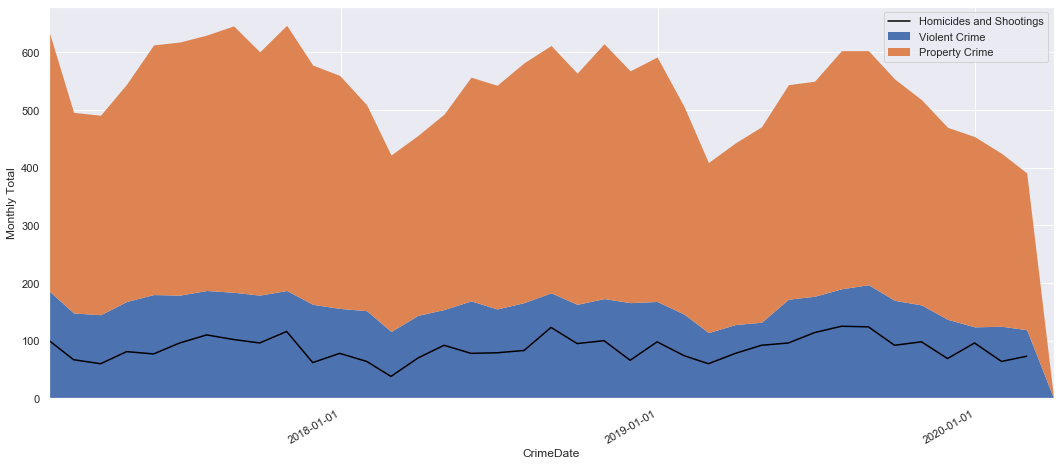

In [24]:
#Readjust volume to seee patterns with homshoot more easily by normalizing prop and violent 1-6 with hom shoot. 
#again all crimes appear to rise and fall together
fig, ax = plt.subplots()
ax.plot(CitywideFinalFrame_monthly['Hom_shoot'], color='black', label='Homicides and Shootings')
CitywideFinalFrame_monthly[['Violent Crime','Property Crime']].div(6).round(0).plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total');

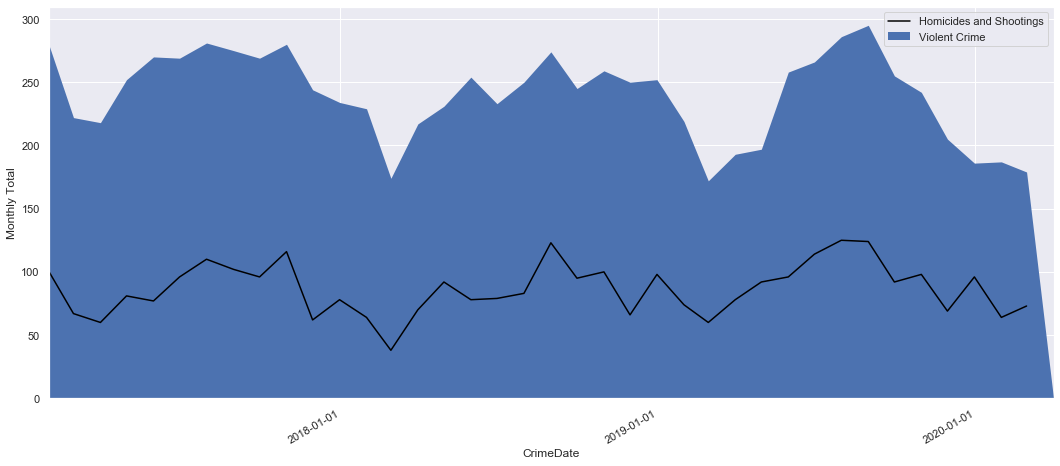

In [25]:
#Another closer look at violent vs homshoot, one doesnt really appear to lead the other, visually, at least
fig, ax = plt.subplots()
ax.plot(CitywideFinalFrame_monthly['Hom_shoot'], color='black', label='Homicides and Shootings')
CitywideFinalFrame_monthly['Violent Crime'].div(4).round(0).plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total');

In [26]:
#Generate rolling averages for time series analysis. smooths result, may reveal patterns unseen prior. 
#new df for 7day rolling mean, as well as one for royghly half a year (182 days)
CitywideFinalFrame_7d = CitywideFinalFrame[data_columns].rolling(7, center=True).mean()
CitywideFinalFrame_7d.head(10)

CitywideFinalFrame_Halfyear = CitywideFinalFrame[data_columns].rolling(182, center=True).mean()
CitywideFinalFrame_Halfyear.head(230)

Description,Hom_shoot,Property Crime,Violent Crime
CrimeDate,,,
2017-01-01,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN
...,...,...,...
2017-08-14,3.181319,86.879121,35.532967
2017-08-15,3.192308,86.912088,35.494505
2017-08-16,3.203297,86.967033,35.439560


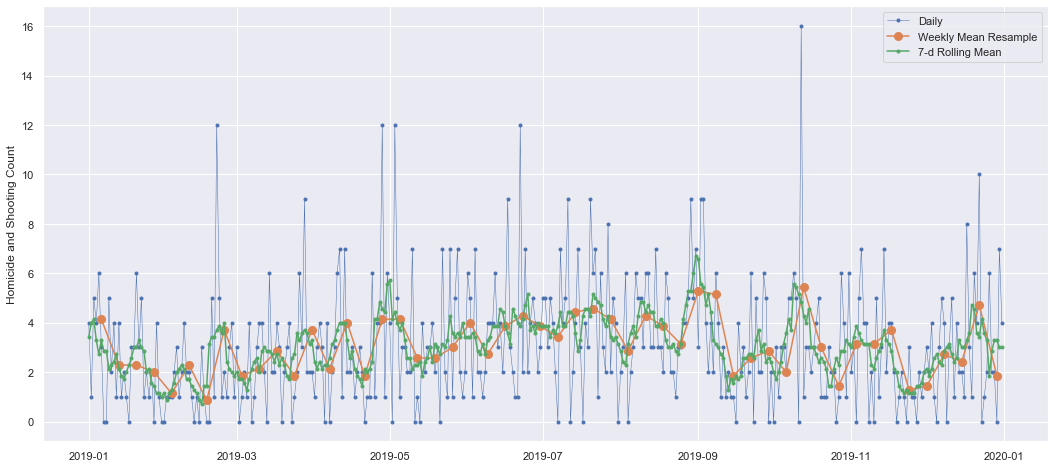

In [27]:
#Same plot as above (pushed out to full year timeframe), but with rolling 7 day average more detailed view better shows the seasonality from initial plots

# Start and end of the date range to extract
start, end = '2019-01', '2019-12'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(CitywideFinalFrame.loc[start:end, 'Hom_shoot'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(CitywideFinalFrame_Week.loc[start:end, 'Hom_shoot'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(CitywideFinalFrame_7d.loc[start:end, 'Hom_shoot'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Homicide and Shooting Count')
ax.legend();

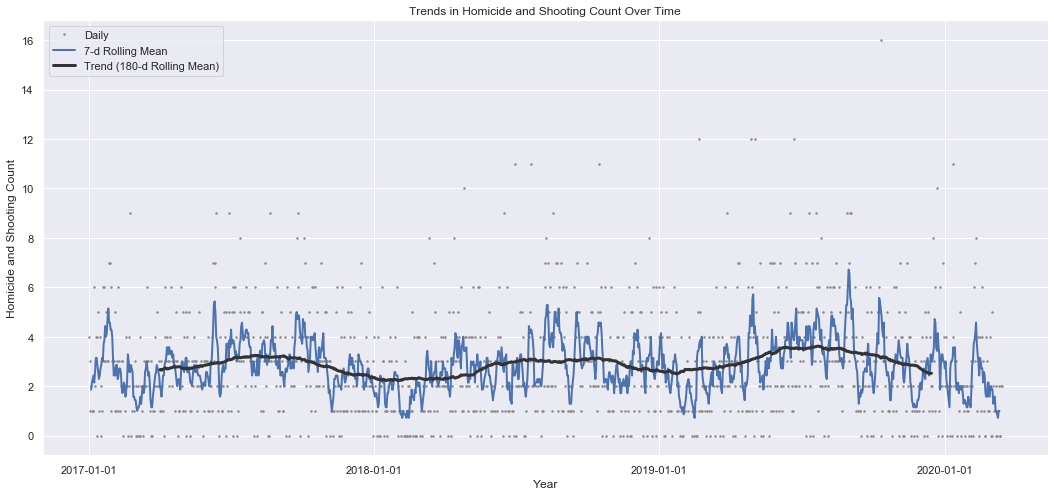

In [28]:
#Another time series plot showing our full dataset with the half year rolling mean to show general historic trends and seasonality.
#there has not been a truly signifigant observed change in homshoots in Baltimore since 2017. Things have remained (generally)
#on pace with historic trends, with a slight* trending upwards
fig, ax = plt.subplots()
ax.plot(CitywideFinalFrame['Hom_shoot'], marker='.', markersize=3, color='-.45',
linestyle='None', label='Daily')
ax.plot(CitywideFinalFrame_7d['Hom_shoot'], linewidth=2, label='7-d Rolling Mean')
ax.plot(CitywideFinalFrame_Halfyear['Hom_shoot'], color='0.2', linewidth=3,
label='Trend (180-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Homicide and Shooting Count')
ax.set_title('Trends in Homicide and Shooting Count Over Time');

In [29]:
#add columns of 5 to 1 for prop and vio to more easily compare in visualizations to homshoot. not for stat testing,
#visualization purposes only. 
CitywideFinalFrame_Halfyear['Prop Crime Corrected'] = CitywideFinalFrame_Halfyear['Property Crime'].div(5)
CitywideFinalFrame_Halfyear['Violent Crime Corrected'] = CitywideFinalFrame_Halfyear['Violent Crime'].div(5)

CitywideFinalFrame_Halfyear.head()


Description,Hom_shoot,Property Crime,Violent Crime,Prop Crime Corrected,Violent Crime Corrected
CrimeDate,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN


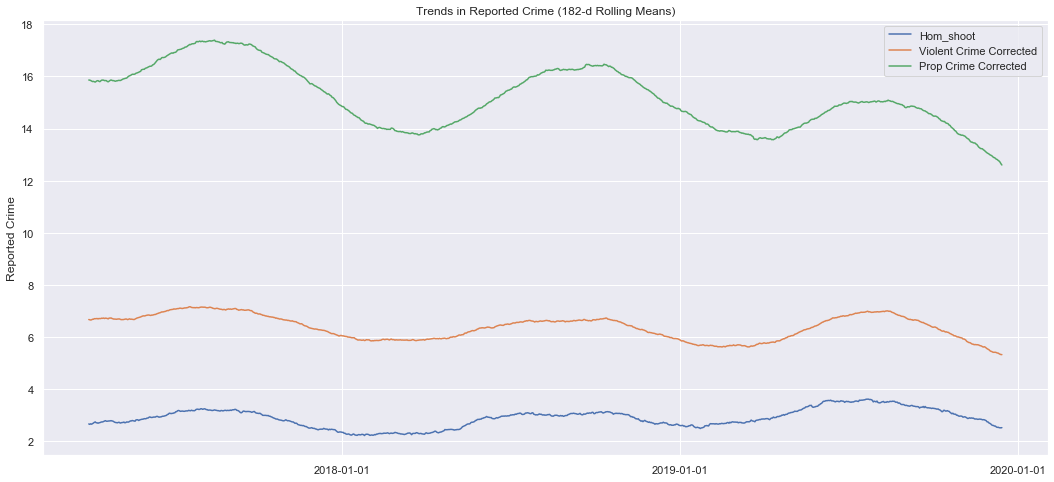

In [30]:
# Plot 365-day rolling mean time series still shows same realtionships and expected seasonality
fig, ax = plt.subplots()
for nm in ['Hom_shoot', 'Violent Crime Corrected', 'Prop Crime Corrected']:
    ax.plot(CitywideFinalFrame_Halfyear[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    #ax.set_ylim(0, 30)
    ax.legend()
    ax.set_ylabel('Reported Crime')
    ax.set_title('Trends in Reported Crime (182-d Rolling Means)');

<Figure size 1296x576 with 0 Axes>

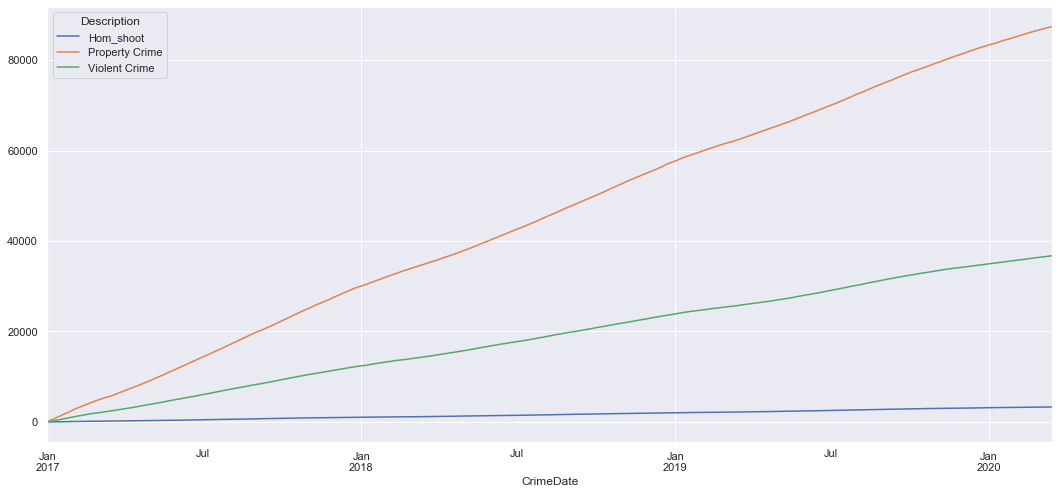

In [31]:
#checking cumulative sum to see if theres might be a pattern. no unexpected observations
df3 = CitywideFinalFrame
del df3['Year']
del df3['Month']

df3=df3.cumsum()

plt.figure();

df3.plot();

Beginning to test for statisitical proof of relationship between homicide/shootings and other crimes

In [32]:
#simple pearon correlation 
from scipy import stats
# Y and Z are numpy arrays or lists of variables 
stats.pearsonr(CitywideFinalFrame['Hom_shoot'], CitywideFinalFrame['Property Crime'])
#First number is correlation, second is signifigance

(0.1264900997307244, 1.4405750555231381e-05)

In [33]:
#You can check the correlation of an entire dataframe, here we check the 7day roling mean values against one another
#
CitywideFinalFrame_7d.corr()

Description,Hom_shoot,Property Crime,Violent Crime
Description,,,
Hom_shoot,1.000000,0.380766,0.527324
Property Crime,0.380766,1.000000,0.744207
Violent Crime,0.527324,0.744207,1.000000


In [34]:
#This is a way to do what we did above but just print and sort to find the relationship with the highest correlation
#here we see violent crime correlations most strongly with homshoot from main df
CitywideFinalFrame.corr()
CitywideFinalFrame.corr()['Hom_shoot'].sort_values(ascending=False)

Description
Hom_shoot         1.000000
Violent Crime     0.309745
Property Crime    0.126490
Name: Hom_shoot, dtype: float64

In [35]:
#Stronger corrlation using 7day rolling mean, violent crime sill the strongest to homshoot
CitywideFinalFrame_7d.corr()['Hom_shoot'].sort_values(ascending=False)

Description
Hom_shoot         1.000000
Violent Crime     0.527324
Property Crime    0.380766
Name: Hom_shoot, dtype: float64

In [36]:
#Stronger corrlation using monthly sum, violent crime sill the strongest to homshoot

CitywideFinalFrame_monthly.corr()['Hom_shoot'].sort_values(ascending=False)

Description
Hom_shoot         1.000000
Violent Crime     0.727279
Property Crime    0.595486
Name: Hom_shoot, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018EB9C42C88>,
      dtype=object)

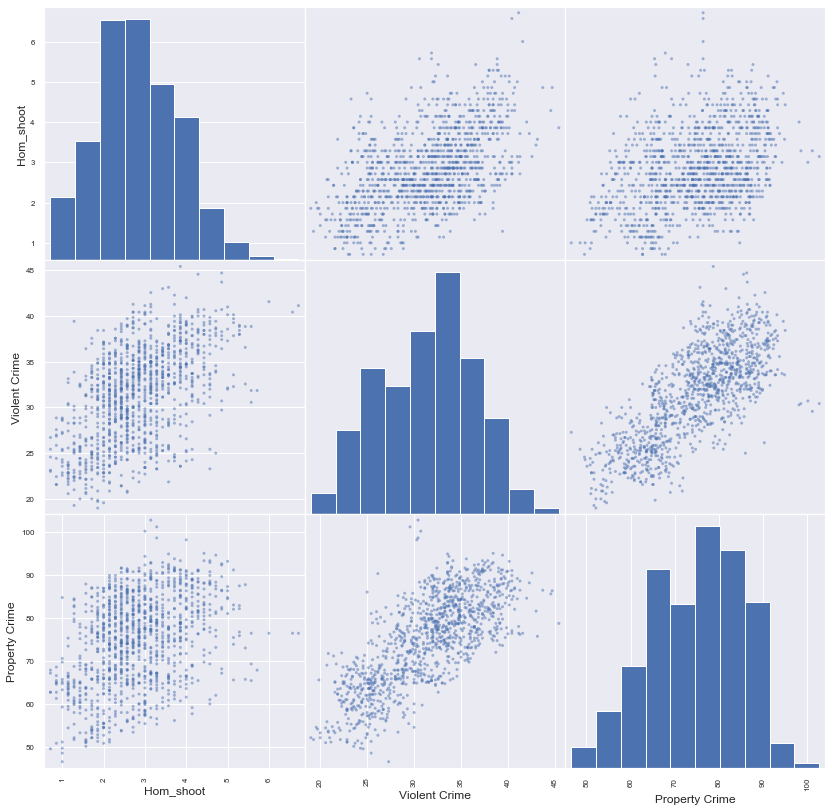

In [37]:
#Scattermarix compares all values from our 7day dataframe to one another and plots the correlation as a scatterplot. 
#This tight the group and the more directional the stronger the realtionship. strongest below shows property and 
#violent as well as violent and homshoot
from pandas.plotting import scatter_matrix

scatter_matrix(CitywideFinalFrame_7d[['Hom_shoot', 'Violent Crime', 'Property Crime']], alpha=0.5, figsize=(14, 14))#, diagonal='kde')


data1: mean=2.831 stdv=0.979
data2: mean=31.431 stdv=5.083


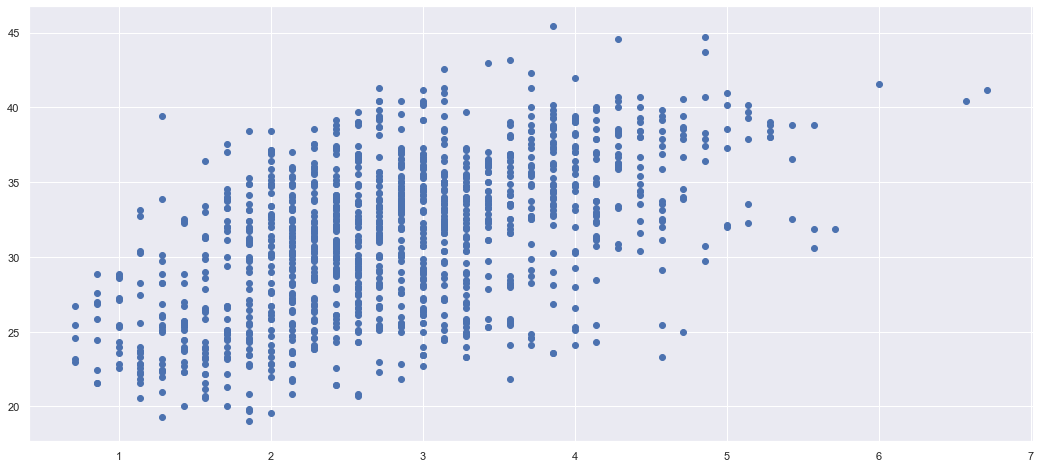

In [38]:
#Check out above up close, hom vs violent

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
data1 = CitywideFinalFrame_7d[['Hom_shoot']]
data2 = CitywideFinalFrame_7d[['Violent Crime']]
#data2 = CitywideFinalFrame_7d[['Property Crime']]

# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
plt.scatter(data1, data2)
plt.show()

https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9

Pandas computed Pearson r: 0.12649009973072436
Scipy computed Pearson r: 0.3097448612495535 and p-value: 2.062745940213732e-27


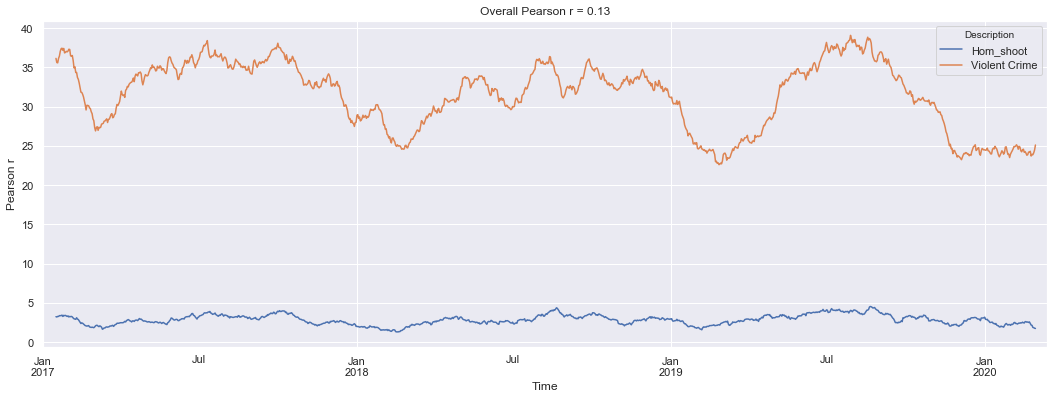

In [39]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

overall_pearson_r = CitywideFinalFrame.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(CitywideFinalFrame.dropna()['Hom_shoot'], CitywideFinalFrame.dropna()['Violent Crime'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

# Compute rolling window 
f,ax=plt.subplots(figsize=(18,6))
CitywideFinalFrame[['Hom_shoot','Violent Crime']].rolling(window=30,center=True).mean().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

#Statistically signifigant, however, an aggreated global r value for the entire sample set of .3 is a bit low

We see a higher r value return when looking at the relationship using every value for both a 30 and 92 day window (bottom chart)


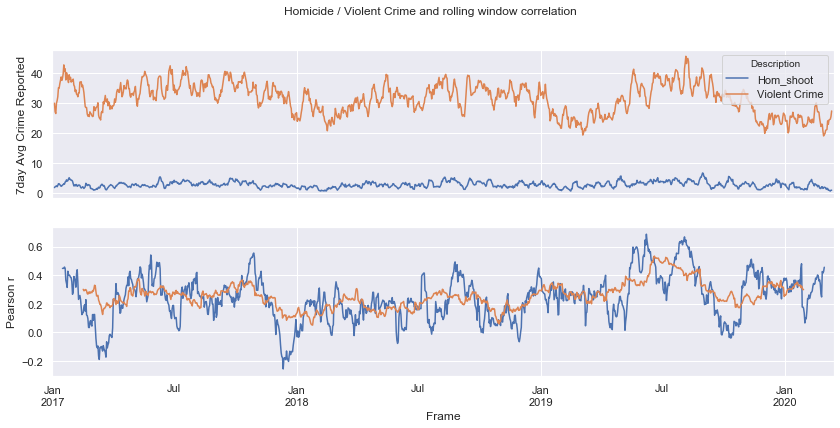

In [40]:
# Set window size to compute moving window crime.
r_window_size = 30
r_window_sizesmooth = 92

# Interpolate missing data.
df_interpolated = CitywideFinalFrame.interpolate()
# Compute rolling window synchrony
rolling_r = CitywideFinalFrame['Hom_shoot'].rolling(window=r_window_size, center=True).corr(CitywideFinalFrame['Violent Crime'])
rolling_rzz = CitywideFinalFrame['Hom_shoot'].rolling(window=r_window_sizesmooth, center=True).corr(CitywideFinalFrame['Violent Crime'])

f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)

CitywideFinalFrame[['Hom_shoot','Violent Crime']].rolling(window=7,center=True).mean().plot(ax=ax[0])
ax[0].set(xlabel='Date',ylabel='7day Avg Crime Reported')
rolling_r.plot(ax=ax[1])
rolling_rzz.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Homicide / Violent Crime and rolling window correlation")

print("We see a higher r value return when looking at the relationship using every value for both a 30 and 92 day window (bottom chart)")

In [41]:
#Checking cross correlation time-lag. Checking to see if one event leads another by lagging the data by a certain time 
#period, in our test 7 days, then checking the correlation of these 2 values
#assistance from https://www.kaggle.com/dedecu/cross-correlation-time-lag-with-pandas
CitywideFinalFrame_7d.head()
x=CitywideFinalFrame_7d.reset_index()

x=x.drop(['Property Crime'], axis=1)
x.head()

Description,CrimeDate,Hom_shoot,Violent Crime
0,2017-01-01,NaN,NaN
1,2017-01-02,NaN,NaN
2,2017-01-03,NaN,NaN
3,2017-01-04,1.857143,29.857143
4,2017-01-05,2.142857,27.000000


In [42]:
def df_derived_by_shift(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

NON_DER = ['CrimeDate',]
df_new = df_derived_by_shift(x, 7, NON_DER)

C:\Users\cyeager\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.


In [43]:
#Drop na values introduced by the lag
df_new = df_new.dropna()
df_new.head(10)

,CrimeDate,Hom_shoot,Violent Crime,Hom_shoot_1,Hom_shoot_2,Hom_shoot_3,Hom_shoot_4,Hom_shoot_5,Hom_shoot_6,Hom_shoot_7,Violent Crime_1,Violent Crime_2,Violent Crime_3,Violent Crime_4,Violent Crime_5,Violent Crime_6,Violent Crime_7
10,2017-01-11,3.142857,34.857143,3.142857,2.571429,2.142857,2.428571,2.285714,2.142857,1.857143,35.000000,32.000000,30.714286,29.857143,26.428571,27.000000,29.857143
11,2017-01-12,2.857143,36.285714,3.142857,3.142857,2.571429,2.142857,2.428571,2.285714,2.142857,34.857143,35.000000,32.000000,30.714286,29.857143,26.428571,27.000000
12,2017-01-13,2.571429,37.428571,2.857143,3.142857,3.142857,2.571429,2.142857,2.428571,2.285714,36.285714,34.857143,35.000000,32.000000,30.714286,29.857143,26.428571
13,2017-01-14,2.285714,38.571429,2.571429,2.857143,3.142857,3.142857,2.571429,2.142857,2.428571,37.428571,36.285714,34.857143,35.000000,32.000000,30.714286,29.857143
14,2017-01-15,2.428571,37.428571,2.285714,2.571429,2.857143,3.142857,3.142857,2.571429,2.142857,38.571429,37.428571,36.285714,34.857143,35.000000,32.000000,30.714286
15,2017-01-16,2.714286,38.142857,2.428571,2.285714,2.571429,2.857143,3.142857,3.142857,2.571429,37.428571,38.571429,37.428571,36.285714,34.857143,35.000000,32.000000
16,2017-01-17,2.857143,39.571429,2.714286,2.428571,2.285714,2.571429,2.857143,3.142857,3.142857,38.142857,37.428571,38.571429,37.428571,36.285714,34.857143,35.000000
17,2017-01-18,3.142857,42.571429,2.857143,2.714286,2.428571,2.285714,2.571429,2.857143,3.142857,39.571429,38.142857,37.428571,38.571429,37.428571,36.285714,34.857143
18,2017-01-19,3.000000,40.428571,3.142857,2.857143,2.714286,2.428571,2.285714,2.571429,2.857143,42.571429,39.571429,38.142857,37.428571,38.571429,37.428571,36.285714
19,2017-01-20,3.714286,41.285714,3.000000,3.142857,2.857143,2.714286,2.428571,2.285714,2.571429,40.428571,42.571429,39.571429,38.142857,37.428571,38.571429,37.428571


In [44]:
#tabl of what our visulization will be
df_new.corr()

,Hom_shoot,Violent Crime,Hom_shoot_1,Hom_shoot_2,Hom_shoot_3,Hom_shoot_4,Hom_shoot_5,Hom_shoot_6,Hom_shoot_7,Violent Crime_1,Violent Crime_2,Violent Crime_3,Violent Crime_4,Violent Crime_5,Violent Crime_6,Violent Crime_7
Hom_shoot,1.000000,0.526847,0.903722,0.801340,0.695392,0.596143,0.492785,0.377945,0.261472,0.521417,0.516990,0.508307,0.495653,0.471995,0.446133,0.422891
Violent Crime,0.526847,1.000000,0.501719,0.468878,0.434812,0.407113,0.381112,0.359442,0.335764,0.960931,0.915660,0.864475,0.812900,0.756881,0.705241,0.653733
Hom_shoot_1,0.903722,0.501719,1.000000,0.903287,0.800266,0.694197,0.594640,0.490899,0.376218,0.526532,0.520611,0.515925,0.507127,0.494042,0.470132,0.444716
Hom_shoot_2,0.801340,0.468878,0.903287,1.000000,0.902920,0.799626,0.693271,0.593408,0.489889,0.501017,0.525687,0.519632,0.514927,0.506044,0.492680,0.468936
Hom_shoot_3,0.695392,0.434812,0.800266,0.902920,1.000000,0.902548,0.799004,0.692336,0.592829,0.467804,0.499940,0.524601,0.518580,0.514045,0.504779,0.491444
Hom_shoot_4,0.596143,0.407113,0.694197,0.799626,0.902548,1.000000,0.902243,0.798362,0.691793,0.433898,0.466765,0.498859,0.523592,0.517570,0.512729,0.503619
Hom_shoot_5,0.492785,0.381112,0.594640,0.693271,0.799004,0.902243,1.000000,0.901966,0.798080,0.406036,0.432780,0.465644,0.497844,0.522735,0.516427,0.511655
Hom_shoot_6,0.377945,0.359442,0.490899,0.593408,0.692336,0.798362,0.901966,1.000000,0.901917,0.379875,0.404813,0.431566,0.464557,0.497025,0.521672,0.515359
Hom_shoot_7,0.261472,0.335764,0.376218,0.489889,0.592829,0.691793,0.798080,0.901917,1.000000,0.358039,0.378781,0.403845,0.430743,0.464168,0.496475,0.520904
Violent Crime_1,0.521417,0.960931,0.526532,0.501017,0.467804,0.433898,0.406036,0.379875,0.358039,1.000000,0.960812,0.915404,0.864052,0.811723,0.755898,0.704694


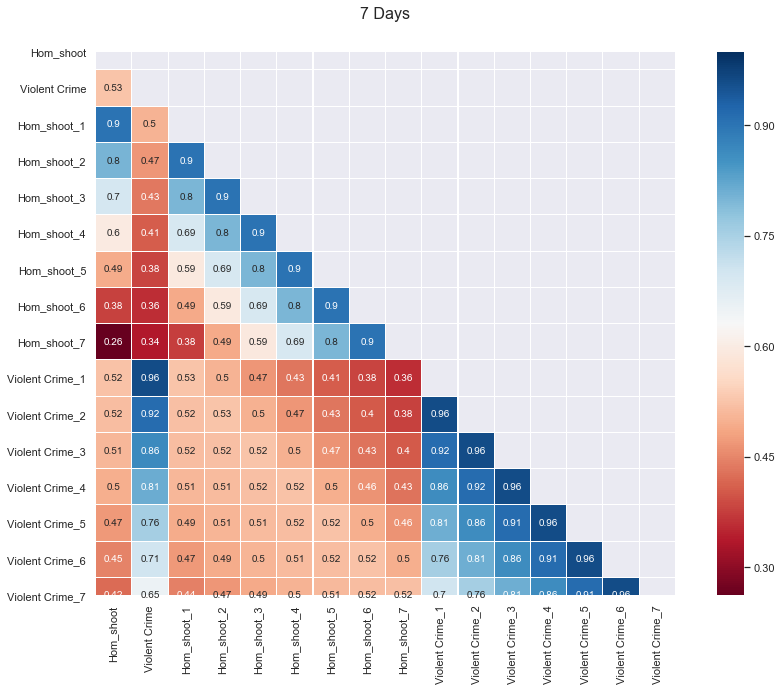

In [45]:
#Visualization of corrlation between the different lags in timeframe.
#the closer the value to 1 the higher the correlation between types and lags
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'7 Days', y=1.05, size=16)

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df_new.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

With assistance from https://pythonfordatascience.org/anova-python/

In [46]:
CitywideFinalFrame['Year'] = CitywideFinalFrame.index.year
CitywideFinalFrame2017=CitywideFinalFrame[(CitywideFinalFrame['Year'] == 2019)]

cut_points = [np.percentile(CitywideFinalFrame2017['Violent Crime'], i) for i in [50, 80, 95]]
CitywideFinalFrame2017['Violent_Crime_Level'] = 1
for i in range(2):
    CitywideFinalFrame2017['Violent_Crime_Level'] = CitywideFinalFrame2017['Violent_Crime_Level'] + (CitywideFinalFrame2017['Violent Crime'] < cut_points[i])
# or <= cut_points[i]
level_map = {1: 'high', 2: 'medium', 3: 'low',4: 'verylow'}
CitywideFinalFrame2017['Violent_Crime_Level'] = CitywideFinalFrame2017['Violent_Crime_Level'].map(level_map)

C:\Users\cyeager\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\cyeager\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\cyeager\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [47]:
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

CitywideFinalFrame2017.head()
rp.summary_cont(CitywideFinalFrame2017['Hom_shoot'].groupby(CitywideFinalFrame2017['Violent_Crime_Level']))

,N,Mean,SD,SE,95% Conf.,Interval
Violent_Crime_Level,,,,,,
high,77,4.285714,2.512375,0.286312,3.720863,4.850565
low,171,2.356725,2.221870,0.169911,2.022722,2.690728
medium,117,3.290598,2.392733,0.221208,2.855165,3.726031


In [48]:
#Run the anova test, resulting in following table
results = ols('Hom_shoot ~ C(Violent_Crime_Level)', data=CitywideFinalFrame2017).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Hom_shoot   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     18.85
Date:                Sat, 04 Apr 2020   Prob (F-statistic):           1.64e-08
Time:                        16:43:54   Log-Likelihood:                -826.79
No. Observations:                 365   AIC:                             1660.
Df Residuals:                     362   BIC:                             1671.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            4.2857      0.267     16.068      0.000       3.761       4.810
C(Violent_Crime_Level)[T.low]       -1.9290      0.321     -6.005      0.000      -2.561      -1.297
C(Violent_Crime_Level)[T.medium]    -0.9951      0.343     -2.897      0.004      -1.671      -0.320
==============================================================================
Omnibus:                      116.394   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              398.567
Skew:                           1.407   Prob(JB):                     2.83e-87
Kurtosis:                       7.277   Cond. No.                         4.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#We find that our f statistic is good at f(2,362) = 19 and our p-value is signifigant at P=1.64^-8

In [50]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table
#below anova table shows us what can be explained by our model, 206 occurances can be explained by our model, 1983 cannot 
#be attributed to having been impacted by violent crime

,sum_sq,df,F,PR(>F)
C(Violent_Crime_Level),206.476975,2.0,18.84566,1.637109e-08
Residual,1983.073710,362.0,NaN,NaN


In [51]:
#That means the current model accounts for 9.0% of the variance in contributing to Homicide and shooting.
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Violent_Crime_Level),206.476975,2.0,103.238488,18.84566,1.637109e-08,0.094301,0.089074
Residual,1983.073710,362.0,5.478104,NaN,NaN,NaN,NaN


In [52]:
#Post-hoc Comparison
print(stats.ttest_ind(CitywideFinalFrame2017['Hom_shoot'][CitywideFinalFrame2017['Violent_Crime_Level'] == 'high'], CitywideFinalFrame2017['Hom_shoot'][CitywideFinalFrame2017['Violent_Crime_Level'] == 'medium']))
print(stats.ttest_ind(CitywideFinalFrame2017['Hom_shoot'][CitywideFinalFrame2017['Violent_Crime_Level'] == 'medium'], CitywideFinalFrame2017['Hom_shoot'][CitywideFinalFrame2017['Violent_Crime_Level'] == 'low']))
print(stats.ttest_ind(CitywideFinalFrame2017['Hom_shoot'][CitywideFinalFrame2017['Violent_Crime_Level'] == 'high'], CitywideFinalFrame2017['Hom_shoot'][CitywideFinalFrame2017['Violent_Crime_Level'] == 'low']))

Ttest_indResult(statistic=2.7783071697659576, pvalue=0.006006848813543145)
Ttest_indResult(statistic=3.3949566488147016, pvalue=0.0007835190437012718)
Ttest_indResult(statistic=6.070159185103899, pvalue=4.806337658109772e-09)


There was a significant effect of violent crime on the number of homicides and shootings, F= 18.8, p < 0.05. Post-hoc testing, using the Bonferroni correction ?= 0.0167, revealed that high levels of violent crime significantly increased the number of homicides and shootings. While a signifigant difference is present on all three test groups, that signifigance inceases dramatically as we go from lower levels to higher levels of violent crime. We can reject the null hypothesis that violent crime has no impact of any kind on homicides and shootings.

Additionally, There are trends and patterns which exist as described throughout the project above. Crime, of all types, tends to rise and fall together. over time it remains relatively the steady when normalization and rolling means are used to check for trends. seasonality plays a major roll in the level of crime. there are some instances in which correlation between violent crime and homicides/shootings is strong and can be used as a precursor to brace for coming incidents. this can be visuzalized and studied using lags.